<a href="https://colab.research.google.com/github/5234560002ebnida/nonfictioner/blob/main/%ED%8F%AC%EC%BB%A4%ED%8E%98%EC%9D%B4%EC%8A%A4%EC%82%AC%EC%A7%84%EB%93%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 웃는 얼굴 만들기
## Dataset은 아래 주소 Smiling or Not | Face Data 에서 퍼었음.
### https://www.kaggle.com/datasets/chazzer/smiling-or-not-face-data

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pwd

'/content'

In [ ]:
cd drive/MyDrive/cnn11

/content/drive/MyDrive/cnn11


Text(0.5, 1.0, 'nonSimle')

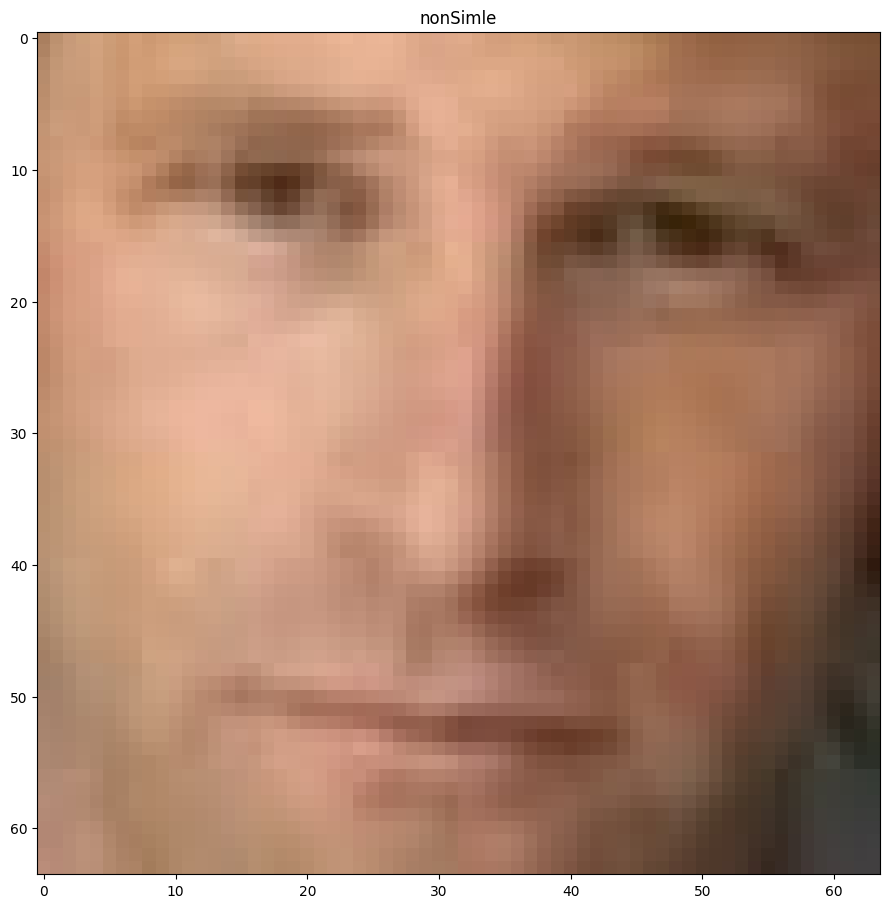

In [ ]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('non_smile/Aaron_Eckhart_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('nonSimle')

In [ ]:
image_sample.shape

(64, 64, 3)

In [ ]:
pwd

'/content/drive/MyDrive/cnn11'

In [ ]:
cd ..

/content/drive/MyDrive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
    )

train = train_gen.flow_from_directory(directory='cnn11',
                                              target_size=(64, 64),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',      # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                             # class_mode='categorical'
                                              batch_size=1)
                                             # shuffle=True)
len(train[0][0])

train[0][0][0] ## 첫번째 배치의 첫번째

Found 603 images belonging to 1 classes.


array([[[0.2392157 , 0.27450982, 0.20784315],
        [0.23137257, 0.26666668, 0.20000002],
        [0.2392157 , 0.2627451 , 0.20784315],
        ...,
        [0.9333334 , 0.7960785 , 0.6784314 ],
        [0.7843138 , 0.6313726 , 0.5176471 ],
        [0.6117647 , 0.45882356, 0.34509805]],

       [[0.24705884, 0.28235295, 0.21568629],
        [0.2392157 , 0.27450982, 0.20784315],
        [0.2392157 , 0.2627451 , 0.20784315],
        ...,
        [0.9607844 , 0.8235295 , 0.7137255 ],
        [0.81568635, 0.67058825, 0.5647059 ],
        [0.65882355, 0.5137255 , 0.40784317]],

       [[0.23529413, 0.27058825, 0.20392159],
        [0.23529413, 0.27058825, 0.20392159],
        [0.2509804 , 0.27450982, 0.21960786],
        ...,
        [0.9725491 , 0.85098046, 0.7411765 ],
        [0.8588236 , 0.7254902 , 0.61960787],
        [0.7254902 , 0.5921569 , 0.48627454]],

       ...,

       [[0.40784317, 0.41176474, 0.3921569 ],
        [0.38431376, 0.38823533, 0.36862746],
        [0.33333334, 0

In [ ]:
train[0][0][0].shape

(64, 64, 3)

In [ ]:
train[0][0].shape

(1, 64, 64, 3)

In [ ]:
train[0][0]

array([[[[0.2392157 , 0.27450982, 0.20784315],
         [0.23137257, 0.26666668, 0.20000002],
         [0.2392157 , 0.2627451 , 0.20784315],
         ...,
         [0.9333334 , 0.7960785 , 0.6784314 ],
         [0.7843138 , 0.6313726 , 0.5176471 ],
         [0.6117647 , 0.45882356, 0.34509805]],

        [[0.24705884, 0.28235295, 0.21568629],
         [0.2392157 , 0.27450982, 0.20784315],
         [0.2392157 , 0.2627451 , 0.20784315],
         ...,
         [0.9607844 , 0.8235295 , 0.7137255 ],
         [0.81568635, 0.67058825, 0.5647059 ],
         [0.65882355, 0.5137255 , 0.40784317]],

        [[0.23529413, 0.27058825, 0.20392159],
         [0.23529413, 0.27058825, 0.20392159],
         [0.2509804 , 0.27450982, 0.21960786],
         ...,
         [0.9725491 , 0.85098046, 0.7411765 ],
         [0.8588236 , 0.7254902 , 0.61960787],
         [0.7254902 , 0.5921569 , 0.48627454]],

        ...,

        [[0.40784317, 0.41176474, 0.3921569 ],
         [0.38431376, 0.38823533, 0.36862746]

In [ ]:
type(train[0][0])

numpy.ndarray

In [ ]:
ABC = np.array(train[0][0])

BCD = np.append(ABC, train[1][0], axis =0 )

BCD.shape

(2, 64, 64, 3)

In [ ]:
X_train = np.array(train[0][0])

for i in range(1,600):
  X_train = np.append(X_train, train[i][0], axis = 0)

X_train.shape

(600, 64, 64, 3)

1/1 [==============================] - 0s 17ms/step
200 [D loss: 0.076596, acc.: 100.00%] [G loss: 3.061634]
1/1 [==============================] - 0s 14ms/step
400 [D loss: 0.808377, acc.: 42.19%] [G loss: 0.861416]
1/1 [==============================] - 0s 14ms/step
600 [D loss: 0.331140, acc.: 96.88%] [G loss: 1.421063]
1/1 [==============================] - 0s 22ms/step
800 [D loss: 0.446475, acc.: 100.00%] [G loss: 1.196230]
1/1 [==============================] - 0s 15ms/step
1000 [D loss: 0.823792, acc.: 25.00%] [G loss: 0.618171]
1/1 [==============================] - 0s 14ms/step
1200 [D loss: 1.200177, acc.: 17.19%] [G loss: 0.667431]
1/1 [==============================] - 0s 17ms/step
1400 [D loss: 0.165380, acc.: 98.44%] [G loss: 2.399617]
1/1 [==============================] - 0s 17ms/step
1600 [D loss: 0.461442, acc.: 87.50%] [G loss: 1.248781]
1/1 [==============================] - 0s 25ms/step
1800 [D loss: 0.678095, acc.: 62.50%] [G loss: 1.006129]
1/1 [================

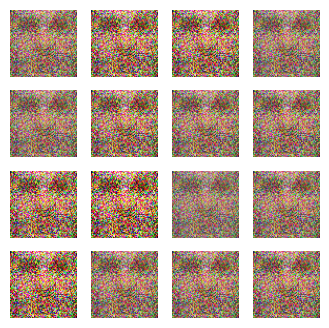

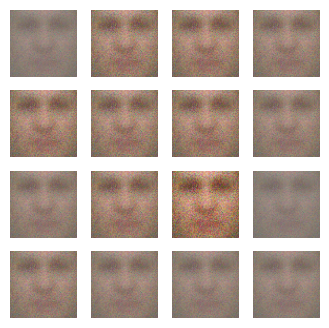

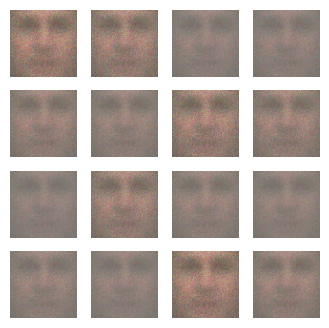

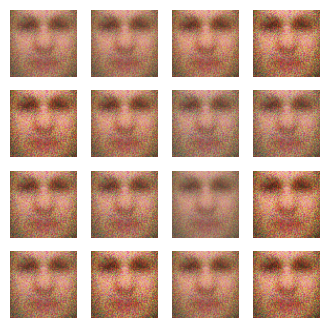

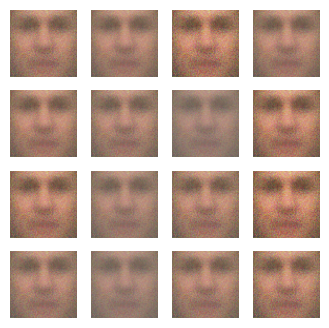

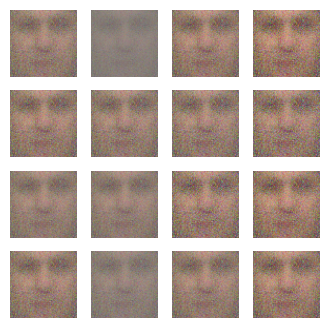

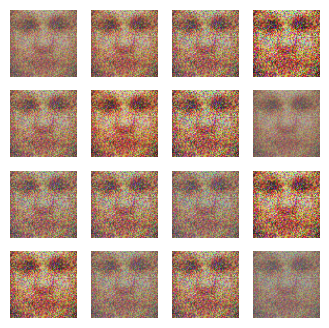

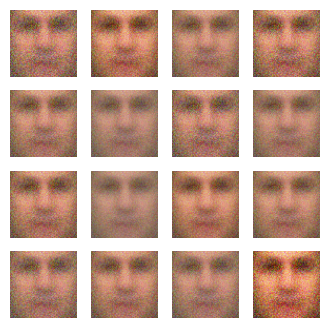

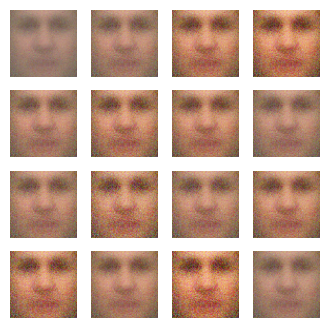

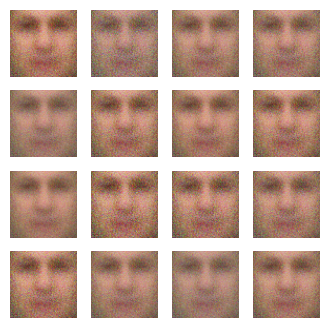

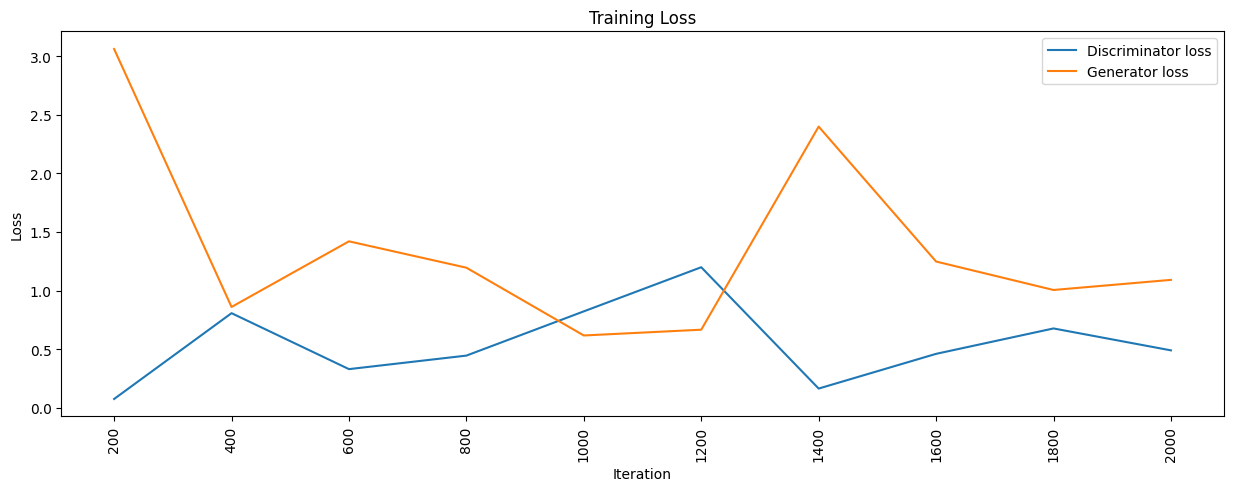

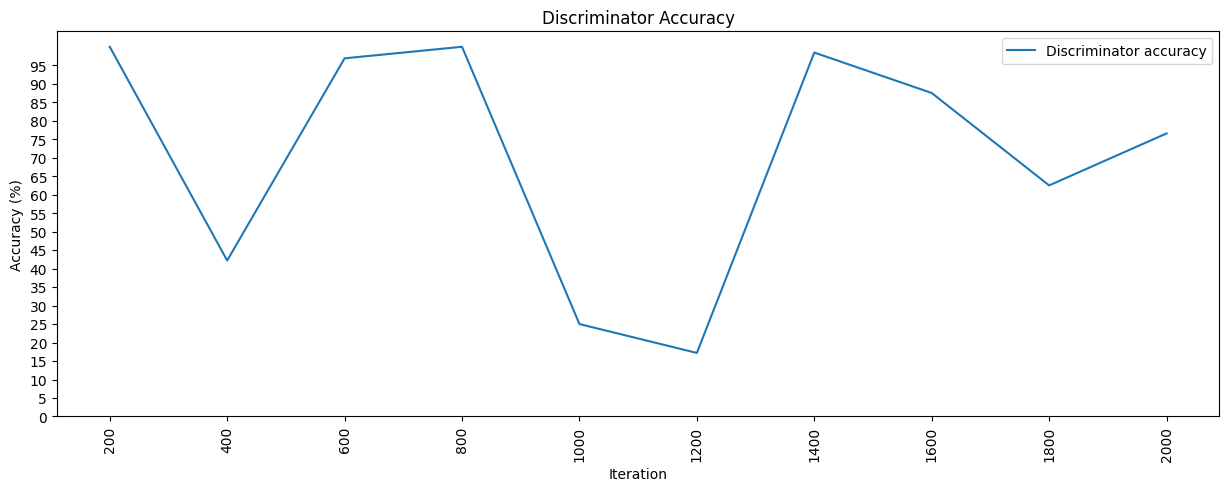

In [ ]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):

    X_train = X_train2
 ###   X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        discriminator.trainable = True

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        discriminator.trainable = False

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)
    ###gen_imgs = 0.5*gen_imgs

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )#, cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 2000
batch_size = 32
sample_interval = 200

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()
